Import Libraries

In [2]:
# Import Libraries
import json
import nltk
import time
import random
import string
import numpy as np
import pandas as pd
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, Flatten, Dense, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
# import StemmerFactory class
from sklearn.model_selection import train_test_split
# Mengunduh resource punkt dari NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# Load Dataset JSON
with open('DatasetTest.json', 'r') as f:
    dataset = json.load(f)
# Inisialisasi variabel
tags = []  # Data tag
inputs = []  # Data input atau pattern
responses = {}  # Data respon
words = []  # Data kata
classes = []  # Data kelas atau tag
documents = []  # Data dokumen
ignore_words = ['?', '!']  # Karakter yang akan diabaikan

# Iterasi melalui intents dalam JSON
for intent in dataset:
    if 'intent' in intent and 'patterns' in intent and 'response' in intent:
        responses[intent['intent']] = intent['response']  # Menyimpan respons berdasarkan intent

        for pattern in intent['patterns']:
            inputs.append(pattern)
            tags.append(intent['intent'])

            # Tokenisasi pola
            w = nltk.word_tokenize(pattern)
            words.extend(w)
            documents.append((w, intent['intent']))

            # Tambahkan intent ke dalam kelas jika belum ada
            if intent['intent'] not in classes:
                classes.append(intent['intent'])
    else:
        print(f"Kesalahan struktur pada intent: {intent}")

# Membuat DataFrame dari data yang sudah diproses
data = pd.DataFrame({"patterns": inputs, "tags": tags})

# Menampilkan beberapa baris pertama DataFrame
print(data.head())
print(len(data))


                                            patterns       tags
0  Apa saja peralatan yang wajib dibawa saat mend...  Kebutuhan
1   Barang apa saja yang harus ada di tas pendakian?  Kebutuhan
2  Apa saja perlengkapan yang tidak boleh terlupa...  Kebutuhan
3  Peralatan apa yang perlu dibawa saat mendaki g...  Kebutuhan
4  Apa barang yang harus dibawa untuk pendakian g...  Kebutuhan
180


Preprocessing The Data



1.   Remove Punctuations



In [5]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))
print(data.head())

                                            patterns       tags
0  apa saja peralatan yang wajib dibawa saat mend...  Kebutuhan
1    barang apa saja yang harus ada di tas pendakian  Kebutuhan
2  apa saja perlengkapan yang tidak boleh terlupa...  Kebutuhan
3  peralatan apa yang perlu dibawa saat mendaki g...  Kebutuhan
4  apa barang yang harus dibawa untuk pendakian g...  Kebutuhan


2. Lemmatization: Converting words to their base or root form.



In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
data['patterns'] = [stemmer.stem(sentence) for sentence in data['patterns']]
print(len(words))

1509


In [7]:
print(data.head())

                                            patterns       tags
0     apa saja alat yang wajib bawa saat daki gunung  Kebutuhan
1         barang apa saja yang harus ada di tas daki  Kebutuhan
2  apa saja lengkap yang tidak boleh lupa saat hi...  Kebutuhan
3          alat apa yang perlu bawa saat daki gunung  Kebutuhan
4       apa barang yang harus bawa untuk daki gunung  Kebutuhan


In [8]:
all_words = ' '.join(data['patterns']).split()
unique_words = set(all_words)
a = len(unique_words)
for word in unique_words:
    print(word)
print("Jumlah kata unik dalam data:", a)

adat
alergi
nanti
seperti
tekan
awal
pandu
wajib
datang
berapa
kabar
dekat
butuh
jejak
daerah
obat
mudah
pengaruh
tentu
kerinci
festival
lain
baca
serang
apakah
hari
utama
baik
tradisi
hemat
patuh
antisipasi
aplikasi
wisatawan
budaya
prau
ritual
sangat
lupa
mendung
jumpa
jelas
selamat
ciremai
tolong
estimasi
alam
bagus
petik
barang
itu
gabung
bantu
bawa
arti
dampak
terima
langgar
jalan
suka
minum
cegah
interaksi
tajam
tas
iya
betul
ratarata
nali
hewan
elektrolit
boleh
malam
a
total
canggih
masih
thanks
tari
bahaya
legenda
biasa
yang
benar
halo
basecamp
dan
usir
tutup
maksud
kenal
asalusul
satu
risiko
ya
sering
selesai
hubung
sampai
kasih
nggak
umum
area
jaga
ambil
ijen
apa
hujan
sewa
timbang
lama
mereka
kabut
merbabu
datar
akurat
dur
masyarakat
ikut
lindung
dalam
sedikit
aman
ke
efisien
liar
atas
ada
ekstrem
longsor
bahan
komunitas
percaya
kamu
keluar
alternatif
naik
tumbuh
dehidrasi
makan
tahan
cukup
tibatiba
sesuatu
tradisional
guna
buat
imbang
halal
cuaca
tunjuk
lebih
hi
jadi
jalur


3.   Tokenization



In [9]:
# Tokenize the data (Tokenisasi Data)
vocabulary = 500
tokenizer = Tokenizer(num_words=vocabulary, oov_token="<OOV>")
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[9, 30, 23, 5, 51, 24, 10, 3, 2],
 [64, 9, 30, 5, 15, 11, 6, 76, 3],
 [9, 30, 77, 5, 106, 78, 168, 10, 16],
 [23, 9, 5, 31, 24, 10, 3, 2],
 [9, 64, 5, 15, 24, 12, 3, 2],
 [9, 30, 23, 65, 5, 15, 24, 10, 16, 6, 2],
 [9, 30, 64, 5, 51, 24, 6, 76, 10, 169, 2],
 [9, 30, 77, 5, 31, 12, 3, 2, 32, 43],
 [9, 64, 79, 5, 15, 24, 10, 3, 2],
 [77, 9, 30, 5, 51, 11, 66, 76, 3, 2],
 [4, 7, 40, 80, 44, 17, 67, 6, 2],
 [9, 5, 15, 45, 81, 17, 170, 10, 3],
 [8, 17, 2, 13, 171, 32, 46],
 [4, 52, 17, 82, 10, 3, 2],
 [9, 172, 17, 82, 5, 15, 173, 10, 16],
 [8, 33, 6, 2, 41, 68, 42, 83, 174, 175],
 [4, 7, 176, 53, 84, 10, 3, 2],
 [9, 5, 31, 177, 178, 17, 69, 3, 2],
 [4, 7, 40, 85, 12, 17, 68, 6, 2],
 [14, 33, 179, 6, 2, 86, 107, 47],
 [9, 33, 6, 2, 10, 18],
 [4, 87, 180, 88, 181, 6, 2],
 [4, 108, 87, 6, 89, 2],
 [14, 46, 87, 6, 2, 10, 18],
 [40, 54, 43, 3],
 [9, 23, 51, 12, 44, 17, 82, 6, 2],
 [4, 7, 109, 42, 33, 67, 6, 2],
 [9, 5, 15, 40, 12, 44, 33, 68, 6, 2],
 [9, 110, 79, 3, 2, 10, 53, 84],
 [9, 182, 17,

4.    Apply Padding


In [10]:
max_len = 100
print("Max length:\n\n", max_len)
# Melakukan proses padding pada data
X_trainpad = pad_sequences(train, maxlen=max_len, padding='post', truncating='post')
# Menampilkan hasil padding
print(X_trainpad)

Max length:

 100
[[  9  30  23 ...   0   0   0]
 [ 64   9  30 ...   0   0   0]
 [  9  30  77 ...   0   0   0]
 ...
 [  4   7 159 ...   0   0   0]
 [  8  29   3 ...   0   0   0]
 [  4   7 308 ...   0   0   0]]


5.   Encoding the Outputs


In [11]:
le = LabelEncoder()

# Mengonversi label kategori menjadi angka
Tags = le.fit_transform(data['tags'])

# Menampilkan hasil encoding
print("Encoded labels:", Tags)

# Menampilkan label asli yang terhubung dengan angka
print("Original tags:", le.classes_)  # Menampilkan kategori yang di-encode menjadi angka
output_length = len(le.classes_)


Encoded labels: [10 10 10 10 10 10 10 10 10 10  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 12 12 12 12 12 12
 12 12 12 12 13 13 13 13  5  5  5  5  5 14 14 14 14 14  1  1  1  1  1  6
  6  6  6  6  4  4  4  4  4  8  8  8  8  8  8  8  8  8  8  3  3  3  3  3
  3  3  3  3  3 15 15 15 15 15 15 15 15 15 15  7  7  7  7  7  7  7  7  7
  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9 11 11 11 11 11 11 11 11 11 11]
Original tags: ['Budaya' 'Confirmation' 'Cuaca di Gunung' 'Dehidrasi' 'Feedback'
 'Goodbye' 'Help' 'Hewan Liar' 'Hipotermia' 'Jalur dan Waktu Pendakian'
 'Kebutuhan' 'Komunitas Pendaki' 'Persiapan cost' 'Salam' 'Thank You'
 'Tumbuhan liar']


In [12]:
for pattern, label in zip(data['patterns'], Tags):
    print(f'Pattern: {pattern} | Encoded Tag: {label} | Original Tag: {le.inverse_transform([label])[0]}')

Pattern: apa saja alat yang wajib bawa saat daki gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: barang apa saja yang harus ada di tas daki | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa saja lengkap yang tidak boleh lupa saat hiking | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: alat apa yang perlu bawa saat daki gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa barang yang harus bawa untuk daki gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa saja alat penting yang harus bawa saat hiking di gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa saja barang yang wajib bawa di tas saat naik gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa saja lengkap yang perlu untuk daki gunung dengan aman | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa barang utama yang harus bawa saat daki gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: lengkap apa saja yang wajib ada dalam tas daki gunung | Encode

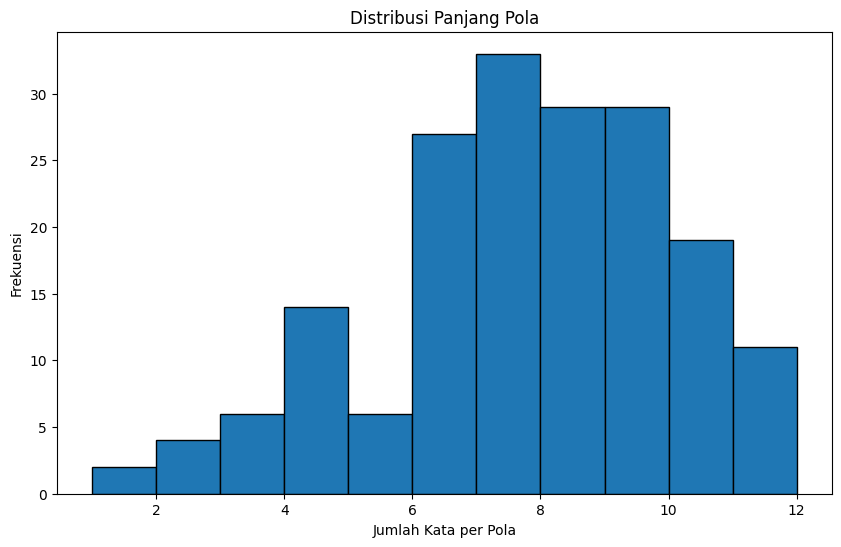

In [13]:
# Hitung panjang pola dalam dataset
pattern_lengths = [len(pattern.split()) for intent in dataset for pattern in intent["patterns"]]

plt.figure(figsize=(10, 6))
plt.hist(pattern_lengths, bins=range(1, max(pattern_lengths) + 1), edgecolor='black')
plt.title("Distribusi Panjang Pola")
plt.xlabel("Jumlah Kata per Pola")
plt.ylabel("Frekuensi")
plt.show()


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_trainpad, Tags, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:",y_val.shape)

Shape of X_train: (144, 100)
Shape of X_val: (36, 100)
Shape of y_train: (144,)
Shape of y_test: (36,)


# Saving the Model
After completing the text processing in five stages, we can save the text processing model using the pickle format.

# Modeling with LSTM Algorithm


In [ ]:
# Creating the model (Membuat Modelling)
i = Input(shape=(max_len,))
x = Embedding(vocabulary, 50)(i)
x = Bidirectional(LSTM(16, return_sequences=True, recurrent_dropout=0.5,recurrent_regularizer=l2(0.01)))(x)
x = Flatten()(x)
x = Dropout(0.8)(x)
x = Dense(output_length, activation="softmax", kernel_regularizer=l2(0.01))(x)

model  = Model(i,x) 
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.007), metrics=['accuracy'])

checkpoint = ModelCheckpoint('best_model_1.keras', monitor='val_accuracy', 
                            save_best_only=True, mode='max', verbose=1)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 50)        │        25,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 32)        │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        51,216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,792 (331.22 KB)

 Trainable params: 84,792 (331.22 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[checkpoint]
)
# Mendapatkan akurasi tertinggi di training dan validation
max_train_acc = max(history.history['accuracy'])  # Akurasi tertinggi selama pelatihan
max_val_acc = max(history.history['val_accuracy'])  # Akurasi tertinggi selama validasi
average_val_acc = np.mean(history.history['val_accuracy']) # Akurasi

print(f"Akurasi tertinggi di training: {max_train_acc}")
print(f"Akurasi tertinggi di validation: {max_val_acc}")
print(f"Akurasi rata rata di validation: {average_val_acc}")

Epoch 1/200
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1094 - loss: 3.4041
Epoch 1: val_accuracy improved from -inf to 0.05556, saving model to best_model_1.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.1146 - loss: 3.4210 - val_accuracy: 0.0556 - val_loss: 3.5936
Epoch 2/200
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1641 - loss: 3.4470
Epoch 2: val_accuracy improved from 0.05556 to 0.19444, saving model to best_model_1.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1557 - loss: 3.4385 - val_accuracy: 0.1944 - val_loss: 3.4262
Epoch 3/200
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1094 - loss: 3.3920
Epoch 3: val_accuracy did not improve from 0.19444
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1123 - loss: 3.3694 - val_accuracy: 0.1944 - val_loss: 3.3188
Epoch 4/200
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1777 - loss: 3.1878
Epoch 4: val_accuracy did not improve from 0.19444
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - 

In [12]:
model = load_model('best_model_1.keras')



In [13]:
def predict_tag(text, model):
    text = [letters.lower() for letters in text if letters not in string.punctuation]
    text = ''.join(text)
    print(f'After Remove : {text}')
    text = stemmer.stem(text)
    print(f'After Stem : {text}')
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    
    # Prediksi
    prediction = model.predict(padded_seq)
    
    # Menemukan index dengan probabilitas tertinggi
    predicted_index = np.argmax(prediction, axis=1)[0]
    
    # Mengonversi index kembali ke tag asli
    predicted_tag = le.inverse_transform([predicted_index])[0]
    
    print(predicted_tag)
    return predicted_tag

# Fungsi untuk mendapatkan tag berdasarkan index

In [14]:

user_input = input("Masukkan pertanyaan: ")
predicted_tag = predict_tag(user_input, model)
Intent_print = predicted_tag
if Intent_print ==  "Cuaca di Gunung"  or Intent_print == "Budaya" or Intent_print == "Jalur dan Waktu Pendakian" or Intent_print == "Komunitas Pendaki":
    print("Pilihlah Subject :\n")
    print("1. Gunung Rinjani :\n")
    print("2. Gunung Bromo :\n")
    print("3. Gunung Merbabu :\n")
    print("4. Gunung Prau :\n")
    print("5. Gunung Ciremai :\n")
    print("6. Gunung Ijen :\n")
    print("7. Gunung Kerinci :\n")
    nomor_gunung = int(input("masukkan nomor gunung: "))
    dictionarty_gunung ={1:"gunungrinjani",2:"gunungbromo",3:"gunungmerbabu",4:"gunungprau",5:"gunungciramai",6:"gunungijen",7:"gunungkerinci"}
    if Intent_print == "Budaya":
        if nomor_gunung >= 1 and nomor_gunung <=7:
            for item in dataset:
                if item["intent"] == Intent_print:
                    print("\nResponses:")
                    for response in item["response"]:
                        if response == dictionarty_gunung[nomor_gunung]:
                            print(item["response"][response])
        else:
            for item in dataset:
                if item["intent"] == Intent_print:
                    print("\nResponses:")
                    for response in item["response"]:
                        print(f"{response}\n")
                        print(f"{item["response"][response]}\n")
    else:
        if nomor_gunung >= 1 and nomor_gunung <=7:
            for item in dataset:
                if item["intent"] == Intent_print:
                    print("\nResponses:")
                    for mountain in item["response"]:
                        if mountain == dictionarty_gunung[nomor_gunung]:
                            print(mountain)
                            for response in item["response"][mountain]:
                                print(f"{response} : {item["response"][mountain][response]}")
        else:
            for item in dataset:
                if item["intent"] == Intent_print:
                    print("\nResponses:")
                    for mountain in item["response"]:
                        print("\n\n")
                        print(mountain)
                        print("\n")
                        for response in item["response"][mountain]:
                            print(f"{response} : {item["response"][mountain][response]}\n")
    
elif Intent_print == "Salam" or Intent_print == "Goodbye" or Intent_print == "Thank You" or Intent_print == "Confirmation" or Intent_print == "Help" or Intent_print == "Feedback": 
    for item in dataset:
        if item["intent"] == Intent_print:
            print("\nResponses:")
            random_response = random.choice(item["response"])
            print(f'{random_response}')

else : 
    for item in dataset:
        if item["intent"] == Intent_print:
            print("\nResponses:")
            for response in item["response"]:
                print(response)
                for poin in item["response"][response]:
                    print(f"-{poin}")

After Remove : kapan barang yang dibawa
After Stem : kapan barang yang bawa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Kebutuhan

Responses:
Persiapan Makanan dan Air
-Untuk hiking 2 hari 1 malam, bawa makanan ringan seperti energy bar, kacang, dan jerky. Pilih makanan yang bergizi dan ringan.
-Bawa setidaknya 2-3 liter air untuk perjalanan sehari penuh, sesuaikan dengan cuaca dan aktivitas. Gunakan botol air atau hydration pack.
-Sangat disarankan membawa makanan ringan yang mudah dimakan saat beristirahat atau mengisi energi.
Perlengkapan Pelindung Diri
-Bawa sunscreen untuk melindungi kulit dari sinar UV, terutama di pegunungan.
-Selalu bawa pakaian berlapis untuk menghadapi cuaca yang berubah drastis.
-Gunakan obat anti-serangga untuk perlindungan dari gigitan serangga.
-Masker berguna untuk melindungi dari debu, polusi, atau angin dingin.
Tas dan Perlengkapan Tambahan
-Untuk hiking 2 hari 1 malam, gunakan tas kapasitas 40-50 liter.
-Gunakan sistem packing efisien seperti roll pakaian 

In [ ]:

# Baca file JSON


Pilihlah Subject :

1. Gunung Rinjani :

2. Gunung Bromo :

3. Gunung Merbabu :

4. Gunung Prau :

5. Gunung Ciremai :

6. Gunung Ijen :

7. Gunung Kerinci :


Responses:
jalurpopuler : Gunung Rinjani memiliki jalur populer seperti Senaru dan Sembalun, yang menawarkan pemandangan indah namun menantang.
jaluralternatif : Jalur alternatif tersedia di bagian selatan untuk menghindari keramaian, dengan waktu pendakian rata-rata 2â€“3 hari.
Waktu Pendakian : Pendakian Gunung Rinjani biasanya memakan waktu 2â€“3 hari tergantung jalur yang dipilih. Jalur Sembalun lebih landai tetapi lebih panjang, sedangkan jalur Senaru lebih cepat namun menanjak.
Waktu terbaik matahari terbit : Waktu terbaik untuk mendaki adalah dini hari jika ingin mencapai Danau Segara Anak saat matahari terbit.
Waktu mencapai danau segara anak : Waktu yang diperlukan untuk mencapai Danau Segara Anak adalah sekitar 1â€“2 hari tergantung jalur yang dipilih.
